In [2]:
# %pip install openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.metrics import r2_score 
from sklearn.metrics import root_mean_squared_error
from scipy.optimize import differential_evolution, minimize
import glob
import os

In [83]:
def import_dfs():
    # Path to the folder containing CSV files
    folder_path = '../dados/'

    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, '5*.csv'))
    # Initialize an empty list to hold dataframes
    data_frames = []

    # Read the first CSV file to establish the schema
    schema = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm','apa_t']


    # Load each remaining CSV file, reorder columns, and append to the list
    for file in csv_files:
        df = pd.read_csv(file)  
        print(file)
        df = df[schema]  # Reorder columns to match the schema
        data_frames.append(df)
        
    
    
    # HARDCODED
    data_frames.append(pd.read_csv('../dados/nh60ab80.csv'))
    csv_files.append('../dados/nh60ab80.csv')

    return data_frames,csv_files 
data_frames,file_list = import_dfs()
print(data_frames[0].columns)

../dados\5.100nh40ab80.csv
../dados\5.102nh20ab40.csv
../dados\5.103nh40ab30.csv
../dados\5.106nh100ab40.csv
../dados\5.107nh55ab55.csv
../dados\5.109nh5ab55.csv
../dados\5.110nh10ab55.csv
../dados\5.112nh78ab35.csv
../dados\5.48nh20ab80.csv
../dados\5.80nh12ab40.csv
../dados\5.81nh5ab30.csv
Index(['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm', 'apa_t'], dtype='object')


In [29]:
Cez = 1

# luci parameters

kcat1        = 0.178 #Constante catal�tica do consumo do �ster (�mol/i.u. per min)
 
kcat2        = 0.327 #Constante catal�tica da hidr�lise da amoxicilina (�mol/i.u. per min)
 
Km1          = 7.905 #Constante de Michaelis-Menten ou constante de afinidade para consumo do �ster(mM) 
 
Km2          = 12.509 #Constante de Michaelis-Menten ou constante de afinidade para hidr�lise da amoxicilina(mM)
 
Tmax         = 0.606 #Taxa de convers�o m�xima do complexo acil-enzima-n�cleo em produto
 
Ken          = 14.350 #Constante de adsor��o do 6-APA
 
kAB          = 3.78 #Constante de inibi��o do �ster(POHPGME)(mM)
 
kAN          = 9.174 #Constante de inibi��o da amoxicilina (mM)
 
kAOH         = 10.907 #Constante de inibi��o do POHPG, produto da hidr�lise da amoxicilina (mM)
 
kNH          = 62.044 #Constante de inibi��o do 6-APA

luci_P = np.zeros(10)
luci_P[0]   = kcat1    
luci_P[1]   = kcat2    
luci_P[2]   = Km1      
luci_P[3]   = Km2      
luci_P[4]   = Tmax     
luci_P[5]   = Ken      
luci_P[6]   = kAB      
luci_P[7]   = kAN      
luci_P[8]   = kAOH     
luci_P[9]  = kNH 

In [28]:
Cez = 1

kcat1        = 0.181 #Constante catal�tica do consumo do �ster (�mol/i.u. per min)
 
kcat2        = 0.395 #Constante catal�tica da hidr�lise da amoxicilina (�mol/i.u. per min)
 
Km1          = 5.449 #Constante de Michaelis-Menten ou constante de afinidade para consumo do �ster(mM) 
 
Km2          = 1.694 #Constante de Michaelis-Menten ou constante de afinidade para hidr�lise da amoxicilina(mM)
 
Tmax         = 0.824 #Taxa de convers�o m�xima do complexo acil-enzima-n�cleo em produto
 
Ken          = 7.947 #Constante de adsor��o do 6-APA
 
kAB          = 0.682 #Constante de inibi��o do �ster(POHPGME)(mM)
 
kAN          = 1.989 #Constante de inibi��o da amoxicilina (mM)
 
kAOH         = 9.856 #Constante de inibi��o do POHPG, produto da hidr�lise da amoxicilina (mM)
 
kNH          = 9.763 #Constante de inibi��o do 6-APA

lucas_P = np.zeros(10)
lucas_P[0]   = kcat1    
lucas_P[1]   = kcat2    
lucas_P[2]   = Km1      
lucas_P[3]   = Km2      
lucas_P[4]   = Tmax     
lucas_P[5]   = Ken      
lucas_P[6]   = kAB      
lucas_P[7]   = kAN      
lucas_P[8]   = kAOH     
lucas_P[9]  = kNH 

eps = 0.001


boundaries = [(eps,4), # Kcat1
              (eps,4), # Kcat2
              (eps,30), # Km1
              (eps,30), # Km2
              (eps,1), # Tmax
              (eps,50), # Ken
              (eps,5000), # kAB
              (eps,500), # kAN
              (eps,500), # kAOH
              (eps,5000), # kNH
              ] 


In [5]:
def enzymic_amox(t,y, 
kcat1,
kcat2,
Km1,
Km2,  
Tmax, 
Ken,  
kAB,  
kAN,  
kAOH, 
kNH):
    FAB = 0
    FNH = 0 
    
    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    # Consumo de ester
    VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X   = CNH/(Ken + CNH)
    
    # Sintese enzimatica
    VS  = VAB*Tmax*X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = ((-(VS - VAN) - (Vh1 + VAN)) + FAB) 
    
    # C. amox
    dy[1] = (VS - VAN)                         
    
    # C. 6-apa
    dy[2] = (-(VS - VAN) + FNH)                
    
    # C. POHPG
    dy[3] =  (Vh1 + VAN)
    
    return np.array(dy) 

In [6]:
def ode15s_amox(P, CI, t):
    try:
        sol = solve_ivp(
            enzymic_amox, 
            t_span=(t[0], t[-1]), 
            t_eval=t, 
            y0=CI, 
            method='RK45', 
            args=P, 
            #atol=1e-8, 
            #tol=1e-6
        )
        if sol.status != 0:
            raise ValueError("ODE solver failed to converge")
        return sol.y
    except Exception as e:
        print(f"Solver failed with error: {e}")
        # Handle solver failure (e.g., return NaNs or retry with different parameters)
        return np.full((len(CI), len(t)), np.nan)
    
    return scipy.integrate.solve_ivp(enzymic_amox,t_span=(t[0],t[-1]),t_eval=t,y0=CI,method='RK45',args=P)

In [7]:
from sklearn.metrics import root_mean_squared_error,r2_score
import seaborn as sns

def mass_deviation(model_output, experimental_data):
    
    exp_mass = np.sum(model_output, axis=1)    
    model_mass = np.sum(experimental_data, axis=1)

    mass_deviation = np.sum(np.abs(exp_mass - model_mass))
    return mass_deviation

def model_eval(x_model, t_model, val_x, val_t):
    '''
    fig, axis = plt.subplots(2, 2, figsize=[6, 6])
    labels = ['POH-PGME','Amoxicillin','6-APA','POHPG']
    mlabels = ['POH-PGME model','Amoxicillin model','6-APA model','POHPG model']
    style = ['.r','.g','.b','.k']
    mstyle = ['-k','-k','-k','-k']    
    for idx,ax in enumerate(axis.flatten()):
        ax.plot(val_t, val_x[:, idx], style[idx], label=labels[idx],linewidth=0.5,markersize=5)
        ax.plot(t_model, x_model[:, idx], mstyle[idx], label=mlabels[idx],linewidth=0.9,markersize=3)
        ax.set_title(f'{labels[idx]}')
        ax.set_ylim([val_x[:, idx].min()-5, val_x[:, idx].max()+5])
        ax.set_xlim([0, val_t[-1]+5])
        ax.legend()
    '''
    fig = plt.figure(figsize=[8, 6])
    labels = ['POH-PGME','Amoxicillin','6-APA','POHPG']
    mlabels = ['POH-PGME model','Amoxicillin model','6-APA model','POHPG model']
    style = ['or','og','ob','ok']
    mstyle = ['-r','-g','-b','-k']    
    for i in range(4):
        plt.plot(val_t, val_x[:,i], style[i], label=labels[i],linewidth=0.5,markersize=5)
        plt.plot(t_model, x_model[:,i], mstyle[i], label=mlabels[i],linewidth=1,markersize=3)
    plt.xlim([0, val_t[-1]+5])
    plt.legend()
    
def eval_all(P_new,plot=True):
    total_error = 0
    surface_error = np.zeros((len(data_frames),3)) # columns = mse error, ester init, apa init 
    total_mass_error = 0
    for idx,df in enumerate(data_frames):
        x_target = df.loc[:,['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']].to_numpy()
        t_target = df['apa_t'].to_numpy()
        
        ic = x_target[0]
        surface_error[idx,1] = ic[0] # ester
        surface_error[idx,2] = ic[2] # apa
        
        t_model = np.linspace(t_target[0],t_target[-1],40)
        
        sol = ode15s_amox(P_new,ic,t_model)
        sol_val = ode15s_amox(P_new,ic,t_target).T

        error = root_mean_squared_error(x_target, sol_val)
        mass_error = mass_deviation(sol_val,x_target)
        r2 = r2_score(x_target,sol_val)

        surface_error[idx,0] = error

        total_error += error
        total_mass_error += mass_error
        #print(ic)
        if plot:
            print(f'Error {ic}: {error}\tmass: {mass_error}\tr2: {r2}')
            print(file_list[idx])
            x_model = sol.T
            model_eval(x_model,t_model,x_target,t_target)
            plt.title(file_list[idx])
    total_error = total_error / len(data_frames) 
    total_mass_error = total_mass_error / len(data_frames)
    surfacedf = pd.DataFrame(surface_error,columns=['RMSE','Ester','APA'])
    if plot:
        plt.figure(figsize=(6,6))
        sns.scatterplot(data=surfacedf, x='Ester', y='APA', size='RMSE', hue='RMSE', sizes=(20, 200),legend='full')
        plt.legend(title='Error Value', loc='upper right', bbox_to_anchor=(-0.15, 1))
        #sns.heatmap(surfacedf,annot=True,fmt=".3f")
        print(f'Total error: {total_error}\tmass error:{total_mass_error}')
    return total_error,total_mass_error
#eval_all(P_new)

In [8]:
def weighted_least_squares_with_covariance(observations, predictions):
    """
    Compute the weighted least squares cost using the covariance matrix from residuals.

    Parameters:
    observations : numpy array
        Observed data of shape (n_samples, n_features).
    predictions : numpy array
        Predicted data of shape (n_samples, n_features).

    Returns:
    total_cost : float
        Total weighted least squares cost.
    covariance_matrix : numpy array
        Covariance matrix of the residuals.
    """
    # Calculate residuals
    residuals = observations - predictions

    # Calculate the covariance matrix from the residuals
    covariance_matrix = np.cov(residuals, rowvar=False)

    # Calculate the inverse of the covariance matrix to get the weight matrix
    W = np.linalg.inv(covariance_matrix)

    # Compute the weighted least squares cost
    total_cost = 0
    for res in residuals:
        total_cost += np.dot(np.dot(res.T, W), res)
    
    return total_cost

In [9]:
def objective_function(params, dataframes):
    total_cost = 0
    weights = np.ones((len(dataframes)))
    weights[3] = 5
    weights[6:8] = 3
    weights[-1] = 5
    for i, df in enumerate(dataframes):
        timestamps = df['apa_t'].values
        observations = df.loc[:, ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']].values  # All columns except the last one
        
        # Initialize predictions array
        
        # Solve the model for each initial condition
        predictions = ode15s_amox(params, observations[0], timestamps).T
        
        # Calculate the WLS cost for this set of observations
        cost = weighted_least_squares_with_covariance(observations, predictions)
        total_cost += cost*weights[i]
    print(total_cost,end='\r')
    return total_cost


In [91]:
# Perform the optimization
result = minimize(objective_function, lucas_P, args=(data_frames,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
lucas_opt_par = result.x
print("Optimized Parameters:", lucas_opt_par )
#nelder [1.76111242e-01 4.28768542e-01 1.71836876e+00 1.42996053e-02
# 9.53931641e-01 1.82350367e+01 3.45380244e-03 4.84532693e-01
# 2.32604795e+01 2.39272396e+00] 2.1307

Optimized Parameters: [1.72909422e-01 3.49593094e-01 4.81300286e-02 3.48339428e-03
 9.99999988e-01 2.01081468e+01 1.00000222e-03 1.22649420e-02
 2.87742865e+01 4.03718806e-01]


In [27]:
optimized_par = [1.76111242e-01, 4.28768542e-01, 1.71836876e+00, 1.42996053e-02, 9.53931641e-01, 1.82350367e+01, 3.45380244e-03, 4.84532693e-01, 2.32604795e+01, 2.39272396e+00]

Error [80.  0. 40.  0.]: 2.4465681180254975	mass: 32.50819182121363	r2: 0.8026854425398379
../dados\5.100nh40ab80.csv
Error [40.5         0.         21.75        3.37262013]: 2.6604576724957743	mass: 27.115693136072778	r2: -0.31189576662487195
../dados\5.102nh20ab40.csv
Error [30.4   0.   43.    2.55]: 1.2819349768752661	mass: 11.795698248930037	r2: 0.7230040442530334
../dados\5.103nh40ab30.csv
Error [4.00389864e+01 6.40149834e-02 1.00045181e+02 1.42108547e+00]: 3.542581667031139	mass: 19.262791743293462	r2: -1.3599133408177322
../dados\5.106nh100ab40.csv
Error [55.        0.       55.        0.623377]: 0.5629306963273291	mass: 4.075102253394192	r2: 0.7706151224723036
../dados\5.107nh55ab55.csv
Error [55.  0.  5.  0.]: 1.7176896129224908	mass: 3.4158185935677565	r2: 0.7287659504666764
../dados\5.109nh5ab55.csv
Error [55.  0. 10.  0.]: 0.9307809938687486	mass: 4.203817538539369	r2: 0.8194139810156703
../dados\5.110nh10ab55.csv
Error [32.5  0.  78.   2.5]: 3.1431971367534075	mass: 12.497

(2.13070978509143, 13.701039757775282)

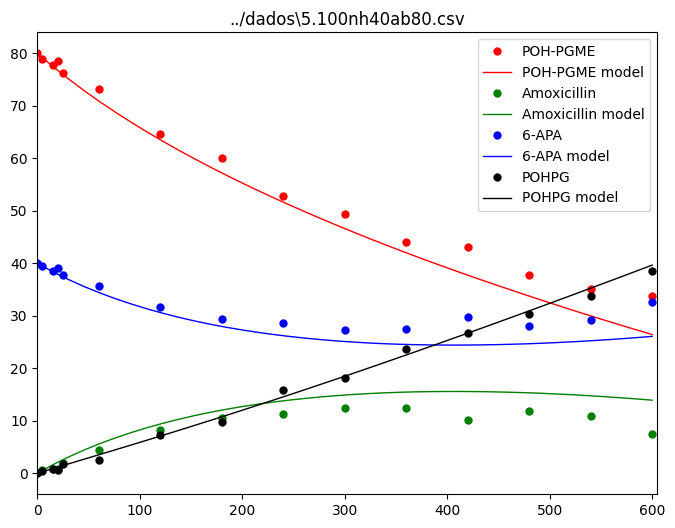

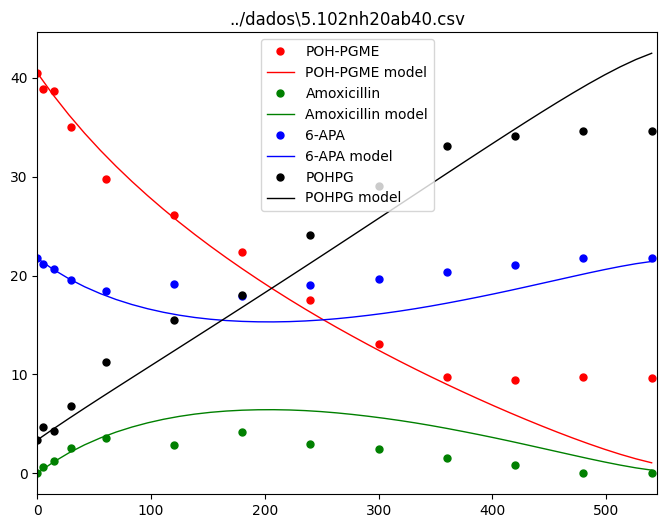

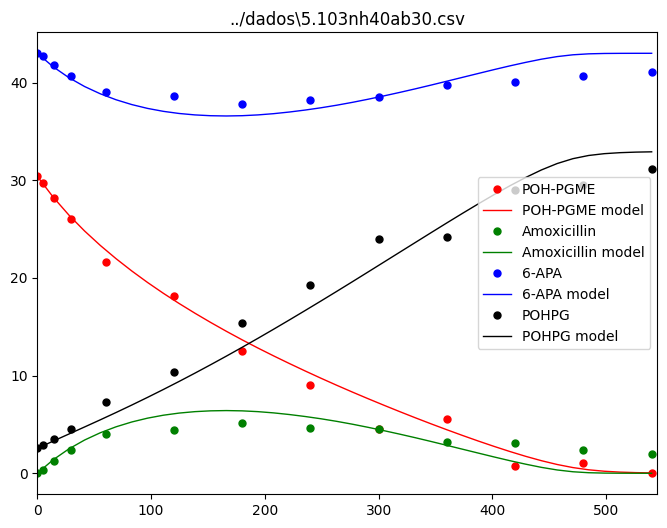

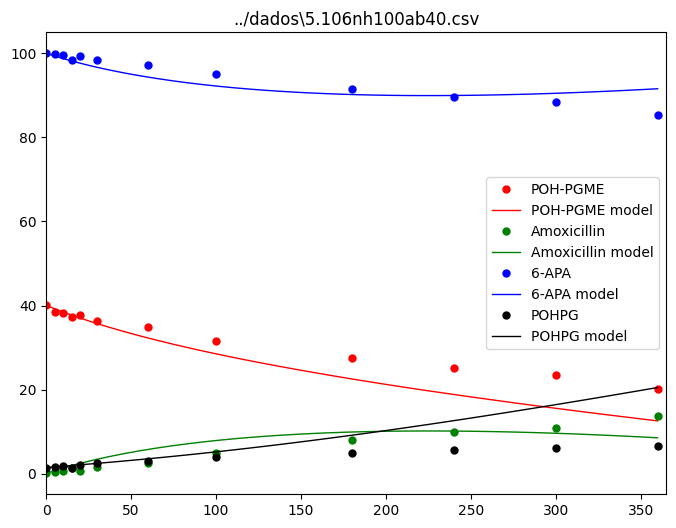

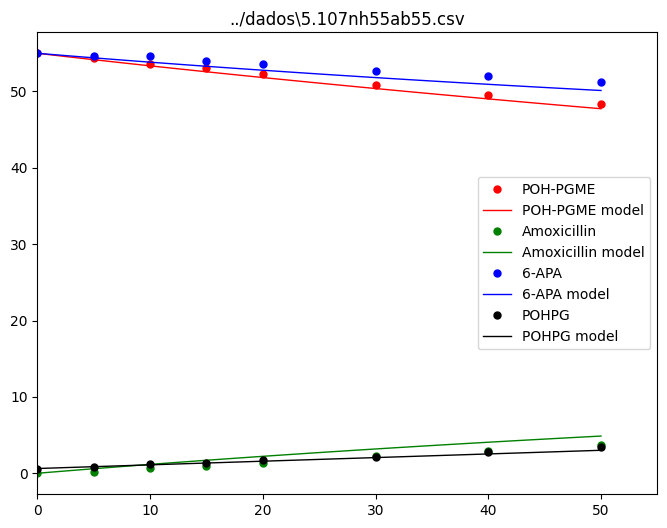

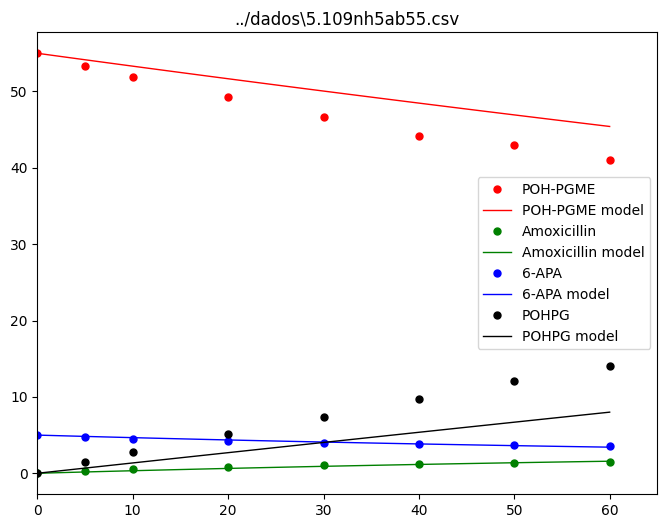

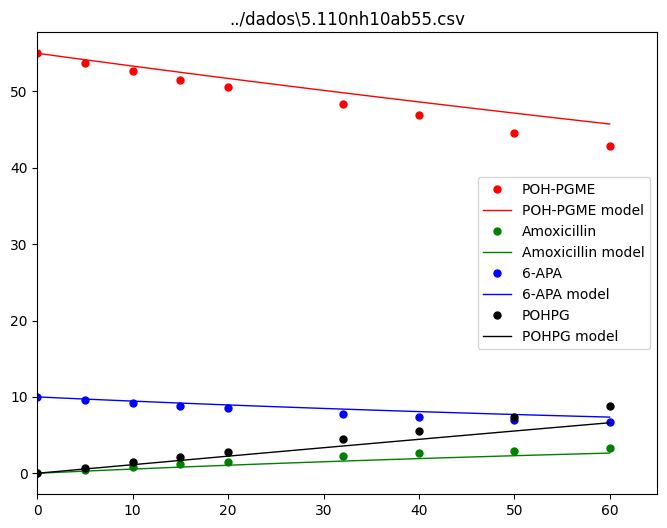

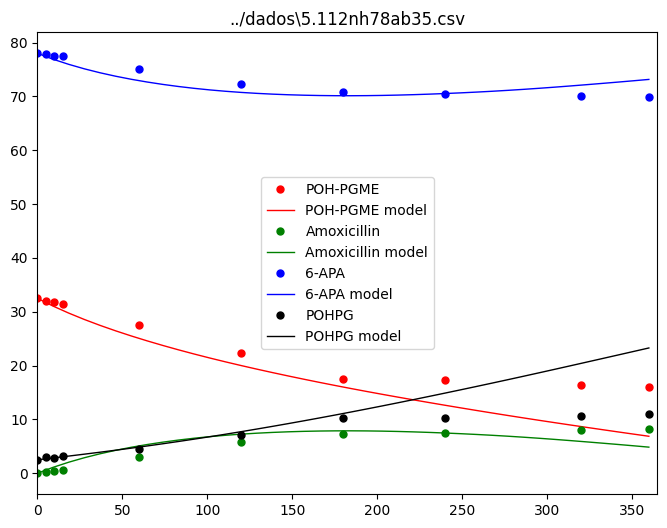

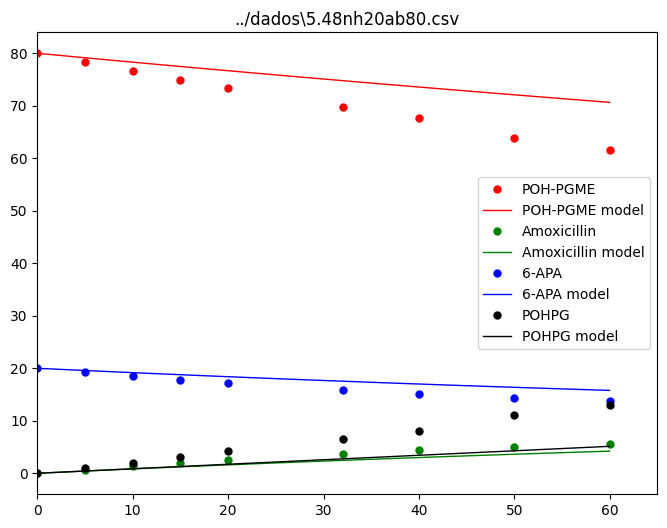

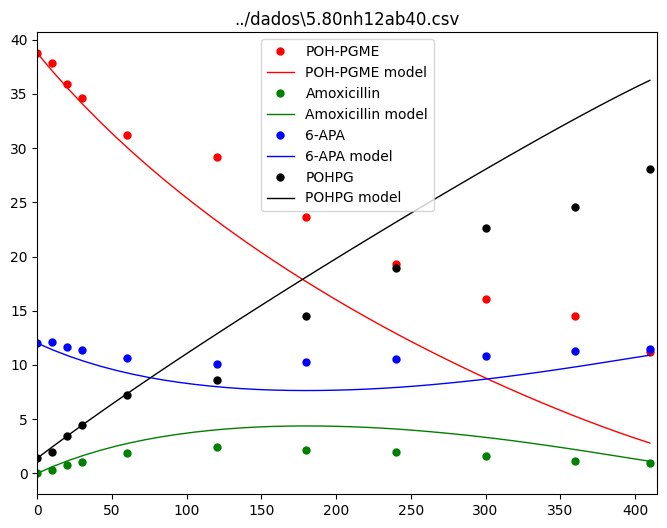

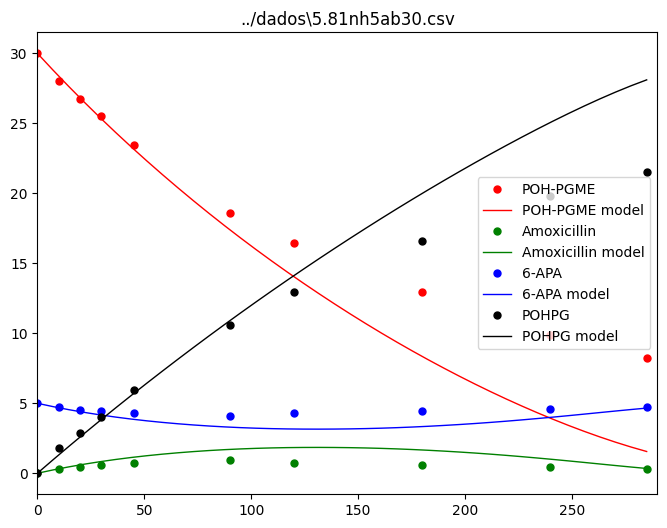

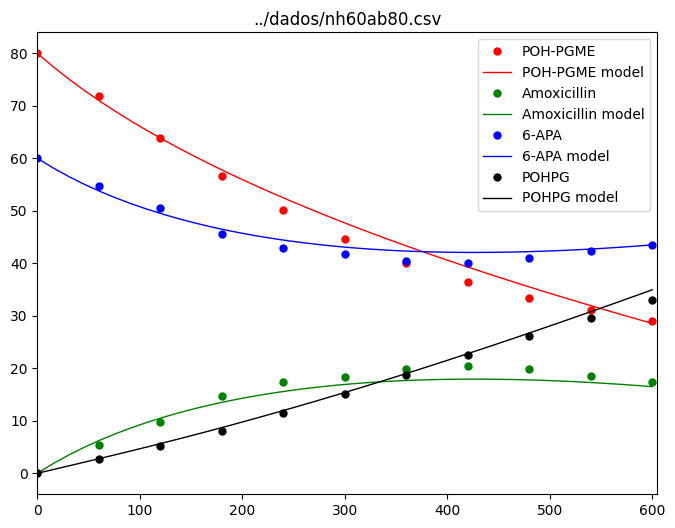

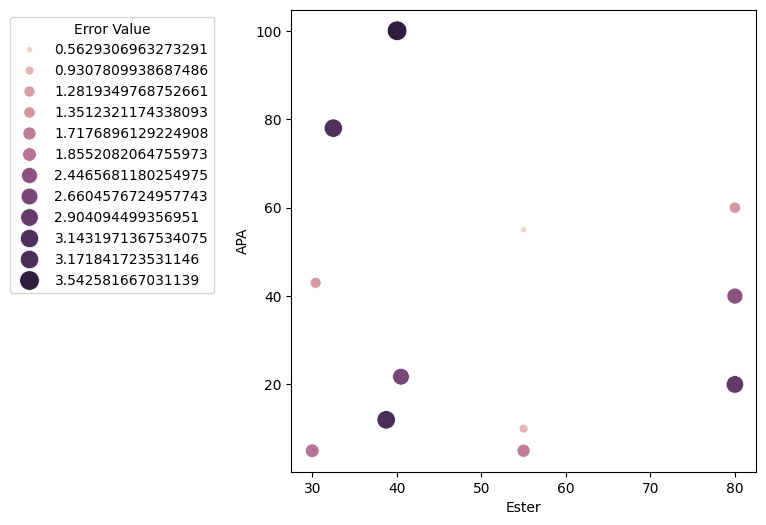

In [93]:
eval_all(optimized_par)

In [94]:
# Perform the optimization
result = minimize(objective_function, luci_P, args=(data_frames,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
luci_optpar = result.x
print("Optimized Parameters:", luci_optpar)

Optimized Parameters: [2.55298006e-01 1.49512907e+00 8.82179710e-02 2.14608589e+01
 9.90009504e-01 1.50497255e+01 3.20367453e+00 7.12584036e-03
 1.93000419e+01 4.31543496e+02]


In [ ]:
eval_all(luci_optpar)

In [50]:
kcat1        = 0.59 #Constante catal�tica do consumo do �ster (�mol/i.u. per min)
 
kcat2        = 3.07 #Constante catal�tica da hidr�lise da amoxicilina (�mol/i.u. per min)
 
Km1          = 0.2 #Constante de Michaelis-Menten ou constante de afinidade para consumo do �ster(mM) 
 
Km2          = 27.47 #Constante de Michaelis-Menten ou constante de afinidade para hidr�lise da amoxicilina(mM)
 
Tmax         = 0.96 #Taxa de convers�o m�xima do complexo acil-enzima-n�cleo em produto
 
Ken          = 16.03 #Constante de adsor��o do 6-APA
 
kAB          = 2672.04 #Constante de inibi��o do �ster(POHPGME)(mM)
 
kAN          = 4.59 #Constante de inibi��o da amoxicilina (mM)
 
kAOH         = 4.51 #Constante de inibi��o do POHPG, produto da hidr�lise da amoxicilina (mM)
 
kNH          = 4550.28 #Constante de inibi��o do 6-APA

process_P = np.zeros(10)
process_P[0]   = kcat1    
process_P[1]   = kcat2    
process_P[2]   = Km1      
process_P[3]   = Km2      
process_P[4]   = Tmax     
process_P[5]   = Ken      
process_P[6]   = kAB      
process_P[7]   = kAN      
process_P[8]   = kAOH
process_P[9]   = kNH


print(process_P)


[5.90000e-01 3.07000e+00 2.00000e-01 2.74700e+01 9.60000e-01 1.60300e+01
 2.67204e+03 4.59000e+00 4.51000e+00 4.55028e+03]


In [97]:
# Perform the optimization
result = minimize(objective_function, process_P, args=(data_frames,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
process_optpar = result.x
print("Optimized Parameters:", process_optpar)

C:\Users\artur\AppData\Local\Temp\ipykernel_3212\1307331141.py:2: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(objective_function, process_P, args=(data_frames,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':10000})


Optimized Parameters: [2.08323177e-01 3.58381867e+00 2.02815895e-01 2.41634983e+01
 9.99599820e-01 1.95511730e+01 3.60598981e+03 5.09019631e+00
 5.46405365e+00 1.10314883e-03]


In [ ]:
eval_all(process_P)

In [ ]:
ga_par = [5.45154072e-01, 4.69012342e-02, 3.00000000e+01, 2.33288420e+00,
 9.80474252e-01, 2.17494884e+01, 8.63474152e+02, 1.17602603e+00,
 4.99999062e+02, 1.74083716e+01]

In [102]:
# Perform the optimization
result = minimize(objective_function, ga_par, args=(data_frames,),bounds=boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
ga_optpar = result.x
print("Optimized Parameters:", ga_optpar)

C:\Users\artur\AppData\Local\Temp\ipykernel_3212\497010817.py:2: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(objective_function, ga_par, args=(data_frames,),bounds=boundaries, method='Nelder-Mead',options={'maxiter':10000})


Optimized Parameters: [4.60645138e-01 8.84456040e-01 3.00000000e+01 4.68362342e+00
 9.89522693e-01 1.23712583e+01 7.65885945e+01 1.31383887e+00
 5.00000000e+02 6.23056611e-01]


In [103]:
labels = ['kcat1',
    'kcat2',
    'Km1',
    'Km2',  
    'Tmax', 
    'Ken',  
    'kAB',  
    'kAN',  
    'kAOH',
    'kNH'
    ]

indexs = ['Best neldermead','lucas nm','luci nm','andrew et al. nm','GA initial guess','GA nm']
all_par_df = pd.DataFrame(np.zeros((len(indexs),len(luci_optpar)+2)),columns=[*labels,'RMSE','Mass_error'],index=indexs)
all_par = [optimized_par,lucas_opt_par,luci_optpar,process_P,ga_par,ga_optpar]
for idx,par in enumerate(all_par):
    error,masserror = eval_all(par,plot=False)
    all_par_df.iloc[idx,:] =  np.hstack((np.array(par),np.array([error,masserror])))
all_par_df

C:\Users\artur\AppData\Local\Temp\ipykernel_3212\2568083330.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_3212\2568083330.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_3212\2568083330.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_3212\2568083330.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_3212\2568083330.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) 

,kcat1,kcat2,Km1,Km2,Tmax,Ken,kAB,kAN,kAOH,kNH,RMSE,Mass_error
Best neldermead,0.176111,0.428769,1.718369,0.014300,0.953932,18.235037,0.003454,0.484533,23.260479,2.392724,2.130710,13.701040
lucas nm,0.172909,0.349593,0.048130,0.003483,1.000000,20.108147,0.001000,0.012265,28.774287,0.403719,2.165199,13.719261
luci nm,0.255298,1.495129,0.088218,21.460859,0.990010,15.049726,3.203675,0.007126,19.300042,431.543496,2.098015,16.066937
andrew et al. nm,0.590000,3.070000,0.200000,27.470000,0.960000,16.030000,2672.040000,4.590000,4.510000,0.000000,11.956429,114.329356
GA initial guess,0.545154,0.046901,30.000000,2.332884,0.980474,21.749488,863.474152,1.176026,4999.990620,17.408372,1.861883,13.759758
GA nm,0.460645,0.884456,30.000000,4.683623,0.989523,12.371258,76.588594,1.313839,500.000000,0.623057,1.948654,14.785164


In [104]:
all_par_df.to_csv('./all_par_wls.csv')

# Oversampled data

In [12]:
def import_dfsOS():
    # Path to the folder containing CSV files
    folder_path = '../dados/oversampled/'

    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, '5*.csv'))
    # Initialize an empty list to hold dataframes
    data_frames = []

    # Read the first CSV file to establish the schema
    schema = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm','t']


    # Load each remaining CSV file, reorder columns, and append to the list
    for file in csv_files:
        df = pd.read_csv(file)  
        print(file)
        df = df[schema]  # Reorder columns to match the schema
        data_frames.append(df)

    return data_frames,csv_files 
data_frames_os,file_list_os = import_dfsOS()
print(data_frames_os[0].columns)

../dados/oversampled\5.100nh40ab80.csv
../dados/oversampled\5.102nh20ab40.csv
../dados/oversampled\5.103nh40ab30.csv
../dados/oversampled\5.106nh100ab40.csv
../dados/oversampled\5.107nh55ab55.csv
../dados/oversampled\5.109nh5ab55.csv
../dados/oversampled\5.110nh10ab55.csv
../dados/oversampled\5.112nh78ab35.csv
../dados/oversampled\5.48nh20ab80.csv
../dados/oversampled\5.80nh12ab40.csv
../dados/oversampled\5.81nh5ab30.csv
../dados/oversampled\5nh60ab80.csv
Index(['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm', 't'], dtype='object')


In [14]:
def objective_function_os(params, dataframes):
    total_cost = 0
    weights = np.ones((len(dataframes)))
    weights[3] = 5
    weights[6:8] = 3
    weights[-1] = 5
    for i, df in enumerate(dataframes):
        timestamps = df['t'].values
        observations = df.loc[:, ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']].values  # All columns except the last one
        
        # Initialize predictions array
        
        # Solve the model for each initial condition
        predictions = ode15s_amox(params, observations[0], timestamps).T
        
        # Calculate the WLS cost for this set of observations
        cost = weighted_least_squares_with_covariance(observations, predictions)
        total_cost += cost*weights[i]
    print(total_cost,end='\r')
    return total_cost

In [24]:
def eval_all_os(P_new,plot=True):
    total_error = 0
    surface_error = np.zeros((len(data_frames_os),3)) # columns = mse error, ester init, apa init 
    total_mass_error = 0
    for idx,df in enumerate(data_frames_os):
        x_target = df.loc[:,['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']].to_numpy()
        try:
            t_target = df['apa_t'].to_numpy()
        except:
            t_target = df['t'].to_numpy()

        ic = x_target[0]
        surface_error[idx,1] = ic[0] # ester
        surface_error[idx,2] = ic[2] # apa
        
        t_model = np.linspace(t_target[0],t_target[-1],40)
        
        sol = ode15s_amox(P_new,ic,t_model)
        sol_val = ode15s_amox(P_new,ic,t_target).T

        error = root_mean_squared_error(x_target, sol_val)
        mass_error = mass_deviation(sol_val,x_target)
        r2 = r2_score(x_target,sol_val)

        surface_error[idx,0] = error

        total_error += error
        total_mass_error += mass_error
        #print(ic)
        if plot:
            print(f'Error {ic}: {error}\tmass: {mass_error}\tr2: {r2}')
            print(file_list_os[idx])
            x_model = sol.T
            model_eval(x_model,t_model,x_target,t_target)
            plt.title(file_list_os[idx])
    total_error = total_error / len(data_frames_os) 
    total_mass_error = total_mass_error / len(data_frames_os)
    surfacedf = pd.DataFrame(surface_error,columns=['RMSE','Ester','APA'])
    if plot:
        plt.figure(figsize=(6,6))
        sns.scatterplot(data=surfacedf, x='Ester', y='APA', size='RMSE', hue='RMSE', sizes=(20, 200),legend='full')
        plt.legend(title='Error Value', loc='upper right', bbox_to_anchor=(-0.15, 1))
        #sns.heatmap(surfacedf,annot=True,fmt=".3f")
        print(f'Total error: {total_error}\tmass error:{total_mass_error}')
    return total_error,total_mass_error

In [33]:
# Perform the optimization
result = minimize(objective_function_os, lucas_P, args=(data_frames_os,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
lucas_optpar_os = result.x
print("Optimized Parameters:", lucas_optpar_os)

Optimized Parameters: [1.85606763e-01 6.00463709e-01 5.88643693e+00 4.04938375e+00
 4.03865410e-01 1.00000000e-03 1.36815938e+00 2.31299657e+00
 1.56822146e+01 6.64903136e-01]


In [34]:
# Perform the optimization
result = minimize(objective_function_os, lucas_P, args=(data_frames_os,),bounds= boundaries, method='TNC',options={'maxiter':10000})

# Optimized parameters
lucas_optpar_os_tnc = result.x
print("Optimized Parameters:", lucas_optpar_os_tnc)

C:\Users\artur\AppData\Local\Temp\ipykernel_14116\1040992469.py:2: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(objective_function_os, lucas_P, args=(data_frames_os,),bounds= boundaries, method='TNC',options={'maxiter':10000})


Optimized Parameters: [0.18816452 0.40658773 5.43618752 1.61477538 0.81937671 7.93475846
 1.16245261 2.11030771 9.91117635 9.76598093]


In [39]:
# Perform the optimization
result = minimize(objective_function_os, ga_par, args=(data_frames_os,),bounds=boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
ga_optpar_os = result.x
print("Optimized Parameters:", ga_optpar_os)

C:\Users\artur\AppData\Local\Temp\ipykernel_14116\3400419666.py:2: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(objective_function_os, ga_par, args=(data_frames_os,),bounds=boundaries, method='Nelder-Mead',options={'maxiter':10000})


Optimized Parameters: [1.89000574e-01 1.09524389e-02 3.00000000e+01 1.04072334e-01
 4.38101442e-01 1.91433218e+00 3.37557907e+03 7.39838586e+00
 5.00000000e+02 1.03317788e+01]


In [ ]:
# Perform the optimization
result = minimize(objective_function_os, ga_par, args=(data_frames_os,),bounds=boundaries, method='TNC',options={'maxiter':10000})

# Optimized parameters
ga_optpar_os_tnc = result.x
print("Optimized Parameters:", ga_optpar_os_tnc)

C:\Users\artur\AppData\Local\Temp\ipykernel_14116\116073819.py:2: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(objective_function_os, ga_par, args=(data_frames_os,),bounds=boundaries, method='TNC',options={'maxiter':10000})


ValueError: `x0` violates bound constraints.

In [64]:
# Perform the optimization
result = minimize(objective_function_os, process_P, args=(data_frames_os,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':200})

# Optimized parameters
process_optpar_os = result.x
print("Optimized Parameters:", process_optpar_os)

Optimized Parameters: [6.76662056e-01 3.99918865e+00 3.51540464e-02 2.97836649e+01
 6.06470746e-01 1.14776118e+01 3.12725501e+03 6.89263022e+00
 1.90780998e+00 4.84767032e+03]


In [52]:
# Perform the optimization
result = minimize(objective_function_os, process_P, args=(data_frames_os,),bounds= boundaries, method='TNC',options={'maxiter':10000})

# Optimized parameters
process_optpar_os_tnc = result.x
print("Optimized Parameters:", process_optpar_os_tnc)

C:\Users\artur\AppData\Local\Temp\ipykernel_14116\873420255.py:2: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(objective_function_os, process_P, args=(data_frames_os,),bounds= boundaries, method='TNC',options={'maxiter':10000})


Optimized Parameters: [5.90000000e-01 3.07000000e+00 2.00000000e-01 2.74700000e+01
 9.60000000e-01 1.60300000e+01 2.67204000e+03 4.59000002e+00
 4.51000000e+00 4.55028000e+03]


In [44]:
# Perform the optimization
result = minimize(objective_function_os, luci_P, args=(data_frames_os,),bounds= boundaries, method='Nelder-Mead',options={'maxiter':10000})

# Optimized parameters
luci_optpar_os = result.x
print("Optimized Parameters:", luci_optpar_os)

Optimized Parameters: [  0.18066702   0.42430652   3.14661723  10.116723     0.66925205
  24.61044013   2.35810737   7.28178365   2.2609788  126.63920227]


In [45]:
# Perform the optimization
result = minimize(objective_function_os, luci_P, args=(data_frames_os,),bounds= boundaries, method='TNC',options={'maxiter':10000})

# Optimized parameters
luci_optpar_os_tnc = result.x
print("Optimized Parameters:", lucas_optpar_os_tnc)

C:\Users\artur\AppData\Local\Temp\ipykernel_14116\1183727032.py:2: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(objective_function_os, luci_P, args=(data_frames_os,),bounds= boundaries, method='TNC',options={'maxiter':10000})


Optimized Parameters: [0.18816452 0.40658773 5.43618752 1.61477538 0.81937671 7.93475846
 1.16245261 2.11030771 9.91117635 9.76598093]


In [65]:
labels = ['kcat1',
    'kcat2',
    'Km1',
    'Km2',  
    'Tmax', 
    'Ken',  
    'kAB',  
    'kAN',  
    'kAOH',
    'kNH'
    ]

indexs = ['Best neldermead','lucas os nm'   ,'lucas os tnc'      ,'luci os nm',   'luci os tnc','andrew et al. os nm','andrew et al. os tnc','GA initial guess','GA os nm']
all_ospar_df = pd.DataFrame(np.zeros((len(indexs),len(luci_optpar_os)+2)),columns=[*labels,'RMSE','Mass_error'],index=indexs)
all_ospar = [optimized_par   ,lucas_optpar_os ,lucas_optpar_os_tnc ,luci_optpar_os, luci_optpar_os_tnc, process_optpar_os, process_optpar_os_tnc,ga_par,ga_optpar_os]
for idx,par in enumerate(all_ospar):
    error,masserror = eval_all_os(par,plot=False)
    all_ospar_df.iloc[idx,:] =  np.hstack((np.array(par),np.array([error,masserror])))
print(ga_par)
all_ospar_df



[0.545154072, 0.0469012342, 30.0, 2.3328842, 0.980474252, 21.7494884, 863.474152, 1.17602603, 4999.99062, 17.4083716]


,kcat1,kcat2,Km1,Km2,Tmax,Ken,kAB,kAN,kAOH,kNH,RMSE,Mass_error
Best neldermead,0.176111,0.428769,1.718369,0.014300,0.953932,18.235037,0.003454,0.484533,23.260479,2.392724,2.308005,269.977629
lucas os nm,0.185607,0.600464,5.886437,4.049384,0.403865,0.001000,1.368159,2.312997,15.682215,0.664903,2.905030,331.001088
lucas os tnc,0.188165,0.406588,5.436188,1.614775,0.819377,7.934758,1.162453,2.110308,9.911176,9.765981,2.699181,255.682606
luci os nm,0.180667,0.424307,3.146617,10.116723,0.669252,24.610440,2.358107,7.281784,2.260979,126.639202,2.587756,231.307480
luci os tnc,0.178819,0.328454,7.905354,12.508871,0.604291,14.349940,4.752943,9.157010,10.828721,60.583165,2.672092,237.928714
andrew et al. os nm,0.676662,3.999189,0.035154,29.783665,0.606471,11.477612,3127.255013,6.892630,1.907810,4847.670316,17.542116,982.908171
andrew et al. os tnc,0.590000,3.070000,0.200000,27.470000,0.960000,16.030000,2672.040000,4.590000,4.510000,4550.280000,12.067663,633.990171
GA initial guess,0.545154,0.046901,30.000000,2.332884,0.980474,21.749488,863.474152,1.176026,4999.990620,17.408372,2.013446,238.143352
GA os nm,0.189001,0.010952,30.000000,0.104072,0.438101,1.914332,3375.579066,7.398386,500.000000,10.331779,3.032758,399.930938


Error [80.1  0.  40.1  0. ]: 2.5164654678681084	mass: 754.0772976156334	r2: 0.4583295455484406
../dados/oversampled\5.100nh40ab80.csv
Error [40.4  0.  21.7  3.5]: 2.7198473972762054	mass: 772.212715429833	r2: -0.7998701370985132
../dados/oversampled\5.102nh20ab40.csv
Error [30.4  0.  43.   2.5]: 1.3170331243476567	mass: 323.95837114632036	r2: 0.33571965704424345
../dados/oversampled\5.103nh40ab30.csv
Error [ 40.    0.1 100.    1.4]: 4.1915444670292255	mass: 331.37352192178514	r2: -4.962059610901077
../dados/oversampled\5.106nh100ab40.csv
Error [55.   0.  55.   0.6]: 0.6037371914492546	mass: 15.624600211006069	r2: 0.6898909578685284
../dados/oversampled\5.107nh55ab55.csv
Error [55.  0.  5.  0.]: 1.807783459929914	mass: 14.359029524076249	r2: 0.6015014454523806
../dados/oversampled\5.109nh5ab55.csv
Error [55.  0. 10.  0.]: 0.9939783585223951	mass: 16.33635409278707	r2: 0.739111947724896
../dados/oversampled\5.110nh10ab55.csv
Error [32.5  0.  78.   2.5]: 3.216042672788076	mass: 243.851062

(2.308004709832171, 269.9776289188936)

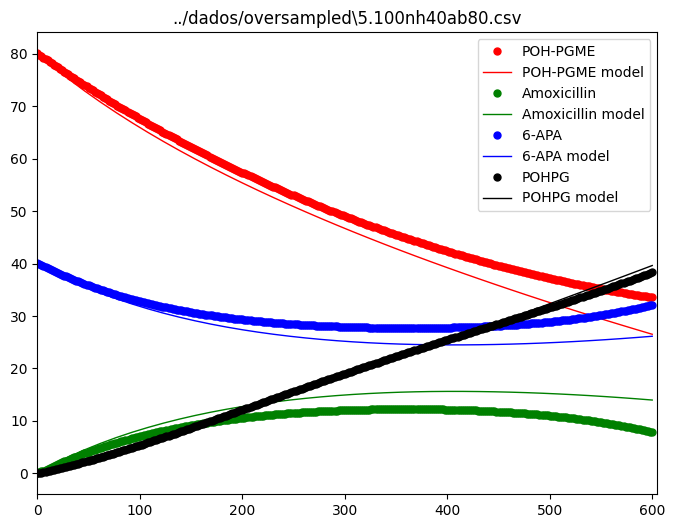

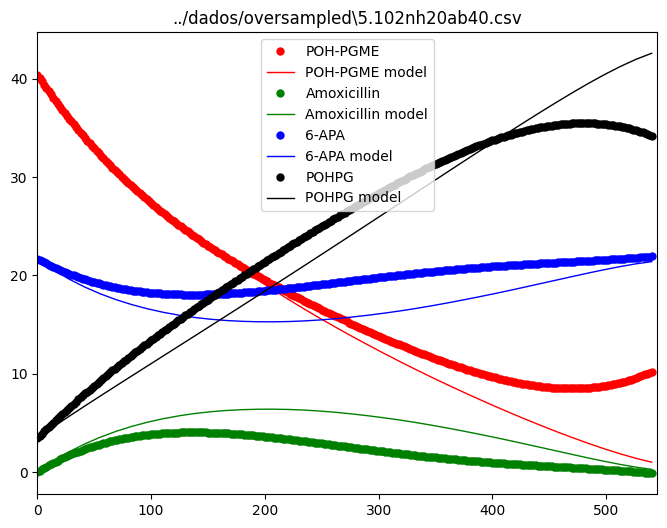

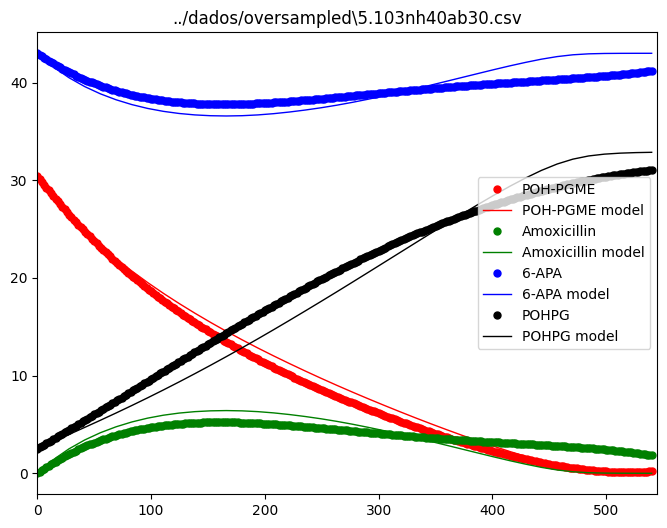

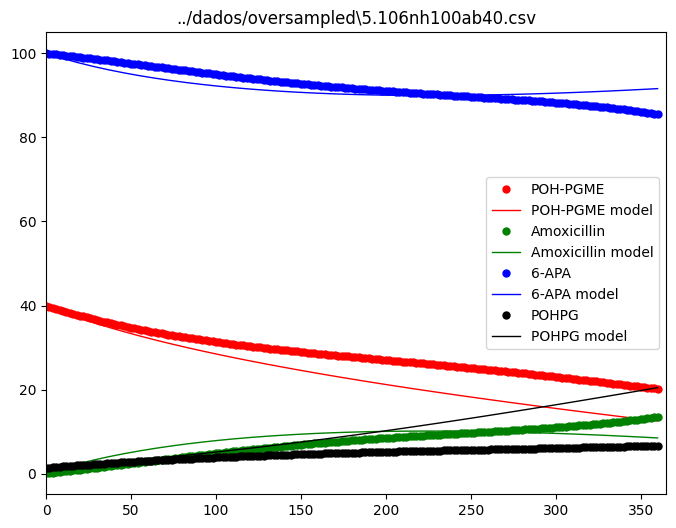

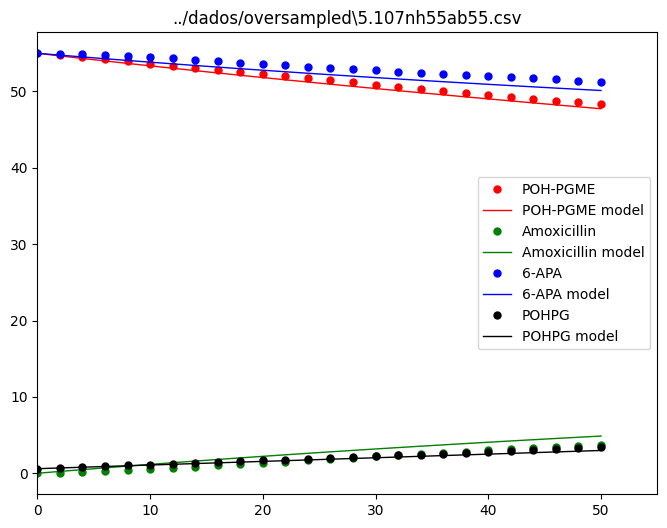

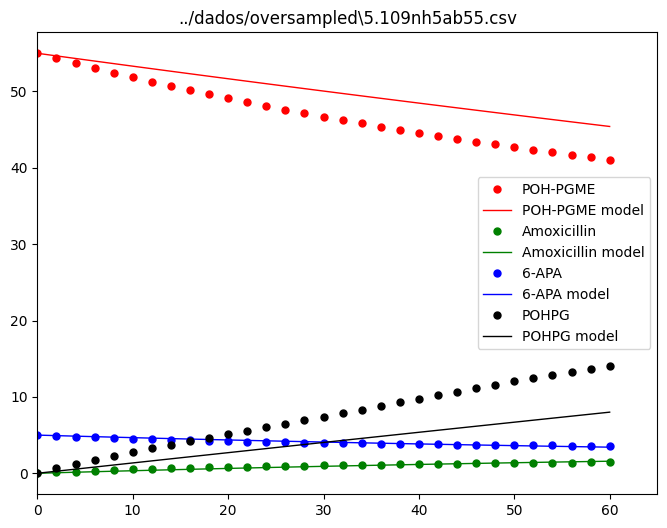

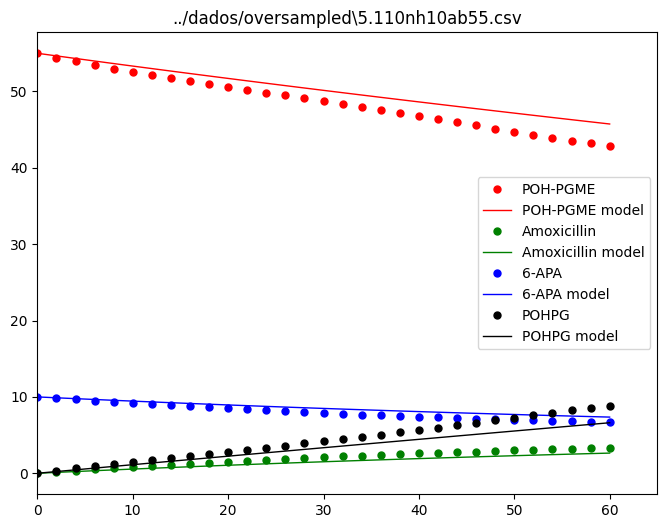

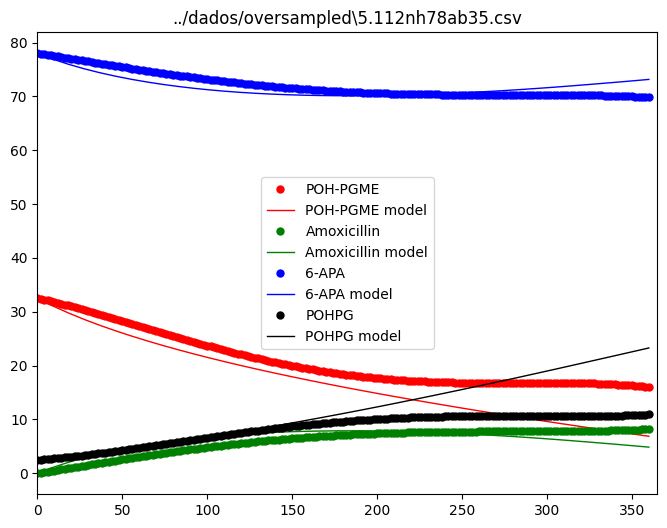

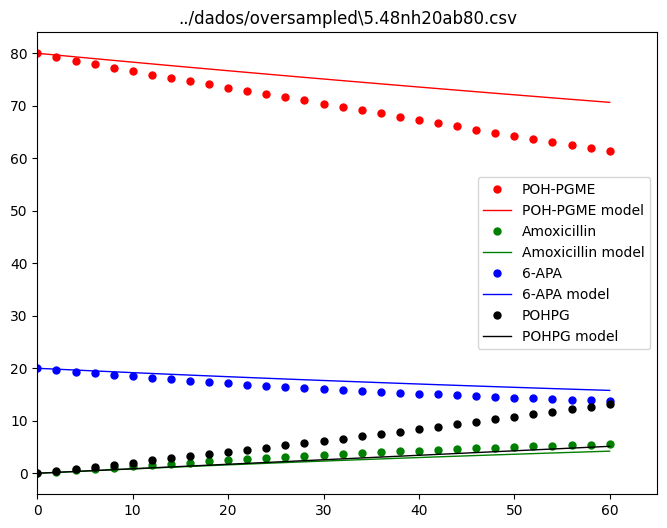

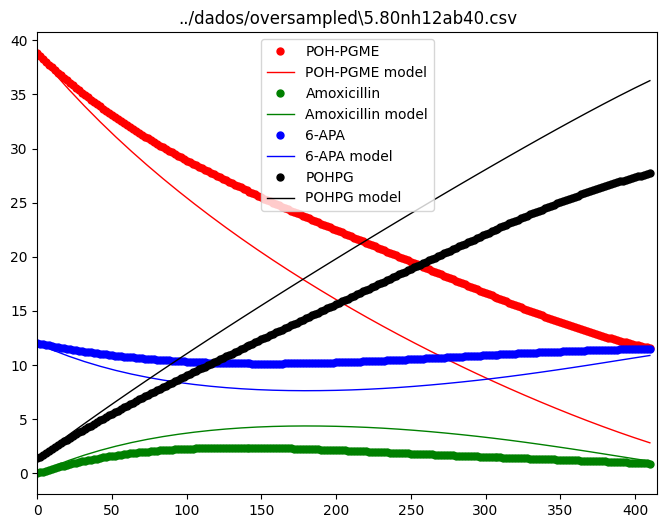

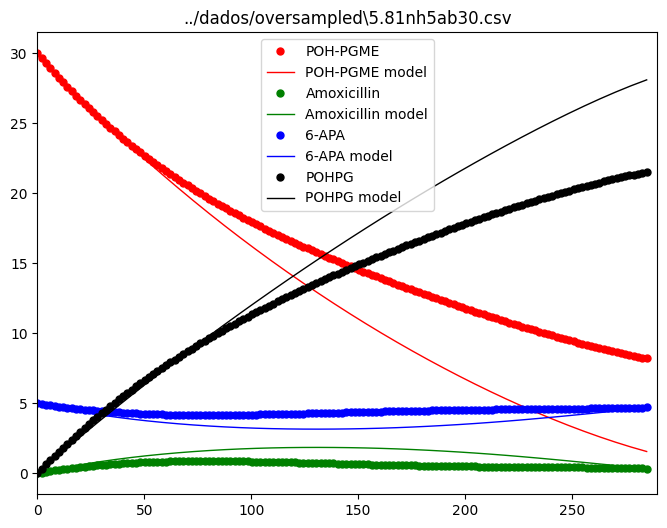

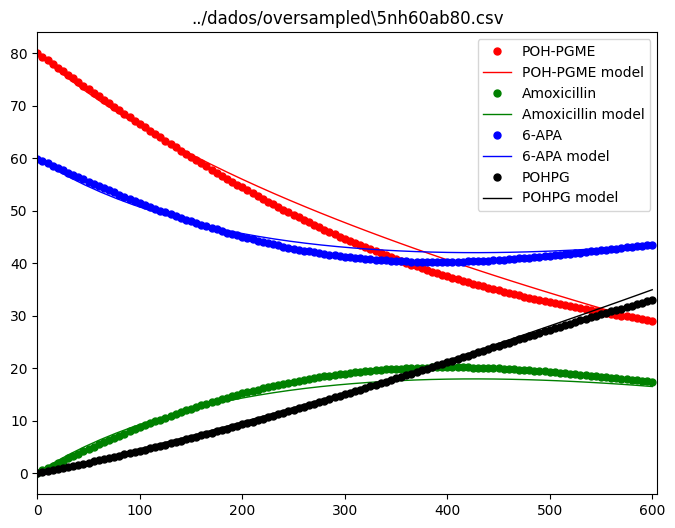

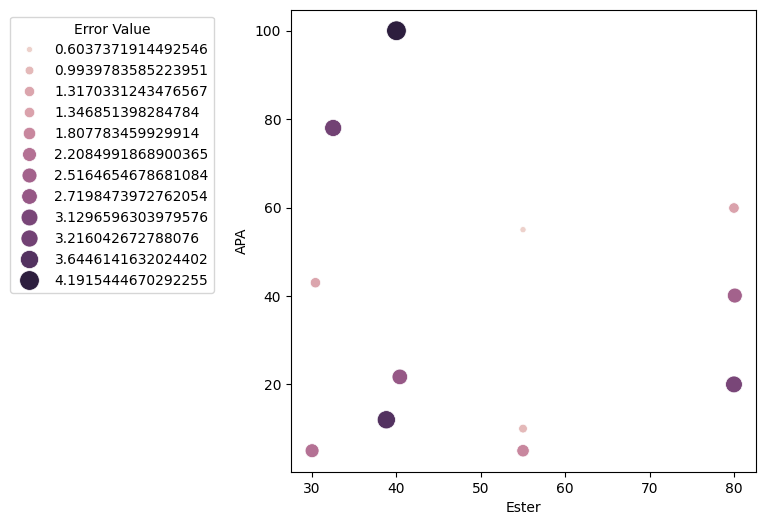

In [63]:
eval_all_os(optimized_par)